# Regresiones

## Preparación de ambiente

### Carga de módulos

In [1]:
# Data Wrangling
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

# Data Viz
import cufflinks as cf

# Modeling
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lars, ElasticNet, Lasso, Ridge, BayesianRidge

# Enviroment setup
cf.go_offline()
pd.set_option('display.float_format', lambda x: "{:,.5f}".format(x))

/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Wrangling

### Carga de datos

In [2]:
boston = load_boston()

/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

#### Creación de TAD

In [130]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
df = pd.DataFrame(data = boston["data"], columns=boston["feature_names"])
df["target"] = boston["target"]

### EDA

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.00000,2.31000,0.00000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000,24.00000
1,0.02731,0.00000,7.07000,0.00000,0.46900,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000,21.60000
2,0.02729,0.00000,7.07000,0.00000,0.46900,7.18500,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000,34.70000
3,0.03237,0.00000,2.18000,0.00000,0.45800,6.99800,45.80000,6.06220,3.00000,222.00000,18.70000,394.63000,2.94000,33.40000
4,0.06905,0.00000,2.18000,0.00000,0.45800,7.14700,54.20000,6.06220,3.00000,222.00000,18.70000,396.90000,5.33000,36.20000


In [7]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Segmentación de sets

In [8]:
tgt = "target"
ls_pred = [x for x in df.columns if x not in [tgt]]

In [9]:
X = df[ls_pred]
y = df[tgt]

In [10]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.00000,2.31000,0.00000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000
1,0.02731,0.00000,7.07000,0.00000,0.46900,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000
2,0.02729,0.00000,7.07000,0.00000,0.46900,7.18500,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000
3,0.03237,0.00000,2.18000,0.00000,0.45800,6.99800,45.80000,6.06220,3.00000,222.00000,18.70000,394.63000,2.94000
4,0.06905,0.00000,2.18000,0.00000,0.45800,7.14700,54.20000,6.06220,3.00000,222.00000,18.70000,396.90000,5.33000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.00000,11.93000,0.00000,0.57300,6.59300,69.10000,2.47860,1.00000,273.00000,21.00000,391.99000,9.67000
502,0.04527,0.00000,11.93000,0.00000,0.57300,6.12000,76.70000,2.28750,1.00000,273.00000,21.00000,396.90000,9.08000
503,0.06076,0.00000,11.93000,0.00000,0.57300,6.97600,91.00000,2.16750,1.00000,273.00000,21.00000,396.90000,5.64000
504,0.10959,0.00000,11.93000,0.00000,0.57300,6.79400,89.30000,2.38890,1.00000,273.00000,21.00000,393.45000,6.48000


## Modelado

### Regresión Lineal

#### Entrenamiento

In [11]:
linreg = LinearRegression()

In [12]:
linreg.fit(X, y)

LinearRegression()

#### Cross validation

In [13]:
ls_res = cross_val_score(estimator = linreg, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")

/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A Nu

In [14]:
np.mean(ls_res), np.std(ls_res)

(0.11405301290101522, 0.712956573713099)

In [15]:
linreg.intercept_

36.45948838508978

In [16]:
y.describe()

count   506.00000
mean     22.53281
std       9.19710
min       5.00000
25%      17.02500
50%      21.20000
75%      25.00000
max      50.00000
Name: target, dtype: float64

In [17]:
pd.DataFrame(linreg.predict(X),columns=['y_hat']).describe()

,y_hat
count,506.00000
mean,22.53281
std,7.91508
min,-4.28131
25%,17.44574
50%,22.11865
75%,27.41002
max,44.67308


#### Pre-análisis

In [18]:
pd.DataFrame(zip(X.columns, linreg.coef_)).sort_values(by=1)

,0,1
4,NOX,-17.76661
7,DIS,-1.47557
10,PTRATIO,-0.95275
12,LSTAT,-0.52476
0,CRIM,-0.10801
9,TAX,-0.01233
6,AGE,0.00069
11,B,0.00931
2,INDUS,0.02056
1,ZN,0.04642


In [19]:
pd.DataFrame(zip(X.columns, pd.Series(linreg.coef_).map(abs))).sort_values(by=1,ascending=False)

,0,1
4,NOX,17.76661
5,RM,3.80987
3,CHAS,2.68673
7,DIS,1.47557
10,PTRATIO,0.95275
12,LSTAT,0.52476
8,RAD,0.30605
0,CRIM,0.10801
1,ZN,0.04642
2,INDUS,0.02056


In [131]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.00000,3.61352,8.60155,0.00632,0.08204,0.25651,3.67708,88.97620
ZN,506.00000,11.36364,23.32245,0.00000,0.00000,0.00000,12.50000,100.00000
INDUS,506.00000,11.13678,6.86035,0.46000,5.19000,9.69000,18.10000,27.74000
CHAS,506.00000,0.06917,0.25399,0.00000,0.00000,0.00000,0.00000,1.00000
NOX,506.00000,0.55470,0.11588,0.38500,0.44900,0.53800,0.62400,0.87100
RM,506.00000,6.28463,0.70262,3.56100,5.88550,6.20850,6.62350,8.78000
AGE,506.00000,68.57490,28.14886,2.90000,45.02500,77.50000,94.07500,100.00000
DIS,506.00000,3.79504,2.10571,1.12960,2.10018,3.20745,5.18843,12.12650
RAD,506.00000,9.54941,8.70726,1.00000,4.00000,5.00000,24.00000,24.00000
TAX,506.00000,408.23715,168.53712,187.00000,279.00000,330.00000,666.00000,711.00000


In [20]:
dc_scores = dict()

In [21]:
str(linreg).split("(")[0]

'LinearRegression'

In [22]:
dc_scores.update({str(linreg).split("(")[0]: np.mean(ls_res)})

In [23]:
dc_scores

{'LinearRegression': 0.11405301290101522}

### Regresión LARS

#### Entrenamiento

In [24]:
Lars?

Init signature:
Lars(
    *,
    fit_intercept=True,
    verbose=False,
    normalize='deprecated',
    precompute='auto',
    n_nonzero_coefs=500,
    eps=2.220446049250313e-16,
    copy_X=True,
    fit_path=True,
    jitter=None,
    random_state=None,
)
Docstring:     
Least Angle Regression model a.k.a. LAR.

Read more in the :ref:`User Guide <least_angle_regression>`.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to false, no intercept will be used in calculations
    (i.e. data is expected to be centered).

verbose : bool or int, default=False
    Sets the verbosity amount.

normalize : bool, default=True
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`~sklearn.preprocessing.StandardScaler` before calling 

In [25]:
larsreg = Lars()

In [26]:
larsreg = larsreg.fit(X, y)

/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





#### Cross-validation

In [27]:
ls_res = cross_val_score(estimator = larsreg, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")

/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A Nu

In [28]:
ls_res

array([ 0.6015054 ,  0.60398145,  0.35873597, -1.10867706])

In [29]:
np.mean(ls_res), np.std(ls_res)

(0.11388643958845451, 0.7128425802035525)

In [30]:
larsreg.intercept_

36.95133114391081

In [31]:
larsreg.coef_

array([-1.09921668e-01,  4.77494449e-02,  3.42654195e-02,  2.67396468e+00,
       -1.82501210e+01,  3.80245356e+00,  9.79271355e-04, -1.48628516e+00,
        3.20424027e-01, -1.31267747e-02, -9.60367186e-01,  9.38636165e-03,
       -5.26015958e-01])

In [32]:
dc_scores.update({str(larsreg).split("(")[0]: np.mean(ls_res)})

In [33]:
dc_scores

{'LinearRegression': 0.11405301290101522, 'Lars': 0.11388643958845451}

### Regresión Cresta

#### Entrenamiento

In [132]:
Ridge?

Init signature:
Ridge(
    alpha=1.0,
    *,
    fit_intercept=True,
    normalize='deprecated',
    copy_X=True,
    max_iter=None,
    tol=0.001,
    solver='auto',
    positive=False,
    random_state=None,
)
Docstring:     
Linear least squares with l2 regularization.

Minimizes the objective function::

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is
the linear least squares function and regularization is given by
the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
This estimator has built-in support for multi-variate regression
(i.e., when y is a 2d-array of shape (n_samples, n_targets)).

Read more in the :ref:`User Guide <ridge_regression>`.

Parameters
----------
alpha : {float, ndarray of shape (n_targets,)}, default=1.0
    Regularization strength; must be a positive float. Regularization
    improves the conditioning of the problem and reduces the variance of
    the estimates. Larger values specify str

In [34]:
ridgereg = Ridge(alpha=170)

In [35]:
ridgereg.fit(X, y)

Ridge(alpha=170)

#### Cross-validation

In [36]:
ls_res = cross_val_score(estimator = ridgereg, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")

/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A Nu

In [37]:
ls_res

array([ 0.58979113,  0.58231525,  0.47761264, -0.26179644])

In [38]:
np.mean(ls_res), np.std(ls_res)

(0.34698064785515315, 0.35426457700618036)

#### Búsqueda del mejor $\alpha$ ($\lambda$)

In [39]:
Ridge?

Init signature:
Ridge(
    alpha=1.0,
    *,
    fit_intercept=True,
    normalize='deprecated',
    copy_X=True,
    max_iter=None,
    tol=0.001,
    solver='auto',
    positive=False,
    random_state=None,
)
Docstring:     
Linear least squares with l2 regularization.

Minimizes the objective function::

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is
the linear least squares function and regularization is given by
the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
This estimator has built-in support for multi-variate regression
(i.e., when y is a 2d-array of shape (n_samples, n_targets)).

Read more in the :ref:`User Guide <ridge_regression>`.

Parameters
----------
alpha : {float, ndarray of shape (n_targets,)}, default=1.0
    Regularization strength; must be a positive float. Regularization
    improves the conditioning of the problem and reduces the variance of
    the estimates. Larger values specify str

In [40]:
df_res = pd.DataFrame()
for i in range(0, 1_000, 5):
    ridgereg = Ridge(alpha=i)
    ridgereg.fit(X, y)
    ls_res = cross_val_score(estimator = ridgereg, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")
    df_res.loc[i, "r2_mean"] = np.mean(ls_res)
    df_res.loc[i, "r2_std"] = np.std(ls_res)
    print(i, "{:,.2%}".format(np.mean(ls_res)), "{:,.2f}".format(np.std(ls_res)))

/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A Nu

0 11.41% 0.71
5 20.01% 0.61
10 22.43% 0.57
15 24.22% 0.55
20 25.67% 0.53
25 26.89% 0.51
30 27.92% 0.49
35 28.81% 0.48
40 29.58% 0.47
45 30.25% 0.46
50 30.84% 0.45
55 31.35% 0.44
60 31.79% 0.43
65 32.19% 0.42
70 32.53% 0.41
75 32.84% 0.41
80 33.10% 0.40
85 33.34% 0.40
90 33.55% 0.39
95 33.73% 0.39
100 33.89% 0.39
105 34.02% 0.38
110 34.15% 0.38
115 34.25% 0.38
120 34.34% 0.37
125 34.42% 0.37
130 34.48% 0.37
135 34.54% 0.37
140 34.58% 0.36
145 34.62% 0.36
150 34.65% 0.36
155 34.67% 0.36
160 34.69% 0.36
165 34.69% 0.36
170 34.70% 0.35
175 34.70% 0.35
180 34.69% 0.35
185 34.68% 0.35
190 34.67% 0.35
195 34.65% 0.35
200 34.63% 0.35
205 34.61% 0.35
210 34.58% 0.35
215 34.55% 0.35
220 34.52% 0.35
225 34.49% 0.35
230 34.46% 0.34
235 34.42% 0.34
240 34.38% 0.34
245 34.35% 0.34
250 34.31% 0.34
255 34.26% 0.34
260 34.22% 0.34
265 34.18% 0.34
270 34.14% 0.34
275 34.09% 0.34
280 34.05% 0.34
285 34.00% 0.34
290 33.95% 0.34
295 33.91% 0.34
300 33.86% 0.34
305 33.81% 0.34
310 33.76% 0.34
315 33.72% 0.3

In [41]:
df_res.iplot(theme="solar")

In [42]:
df_res.sort_values(by="r2_mean")

,r2_mean,r2_std
0,0.11405,0.71296
5,0.20011,0.60525
10,0.22428,0.57454
15,0.24217,0.55024
20,0.25669,0.52937
...,...,...
160,0.34685,0.35689
180,0.34691,0.35200
165,0.34694,0.35553
175,0.34697,0.35309


In [43]:
ridgereg = Ridge(alpha=170)

In [44]:
ridgereg.fit(X, y)

Ridge(alpha=170)

In [45]:
ridgereg.intercept_

39.526619339976584

In [46]:
pd.DataFrame(zip(X.columns, ridgereg.coef_)).sort_values(by=1)

,0,1
7,DIS,-1.08464
10,PTRATIO,-0.83129
12,LSTAT,-0.69605
4,NOX,-0.15001
0,CRIM,-0.10131
2,INDUS,-0.05245
9,TAX,-0.01632
6,AGE,0.00720
11,B,0.00906
1,ZN,0.05540


In [47]:
dc_scores.update({str(ridgereg).split("(")[0]: np.mean(ls_res)})

In [48]:
dc_scores

{'LinearRegression': 0.11405301290101522,
 'Lars': 0.11388643958845451,
 'Ridge': 0.2873317855328939}

### Regresión Lasso

#### Entrenamiento

In [49]:
lassreg = Lasso(alpha=0.5)

In [50]:
lassreg.fit(X, y)

Lasso(alpha=0.5)

#### Cross-validation

In [51]:
ls_res = cross_val_score(estimator = lassreg, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")

In [52]:
ls_res

array([ 0.61654703,  0.54124089,  0.40252425, -0.68206998])

In [53]:
np.mean(ls_res), np.std(ls_res)

(0.21956054923034524, 0.526186714114679)

In [54]:
lassreg.intercept_

32.520860962576535

In [55]:
pd.DataFrame(zip(X.columns, lassreg.coef_)).sort_values(by=1)

,0,1
7,DIS,-0.93660
10,PTRATIO,-0.75875
12,LSTAT,-0.65629
0,CRIM,-0.08329
9,TAX,-0.01544
2,INDUS,-0.00525
3,CHAS,0.00000
4,NOX,-0.00000
6,AGE,0.00360
11,B,0.00947


#### Búsqueda de la mejor $\alpha$ ($\lambda$)

In [56]:
df_res = pd.DataFrame()
for i in range(10, 1010, 10):
    lasso = Lasso(alpha=i/100)
    lasso.fit(X, y)
    ls_res = cross_val_score(estimator = lasso, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")
    df_res.loc[i/100, "r2_mean"] = np.mean(ls_res)
    df_res.loc[i/100, "r2_std"] = np.std(ls_res)
    print(i, "{:,.2%}".format(np.mean(ls_res)), "{:,.2f}".format(np.std(ls_res)))

10 19.19% 0.61
20 21.23% 0.58
30 20.97% 0.57
40 20.35% 0.57
50 21.96% 0.53
60 23.64% 0.49
70 25.26% 0.45
80 26.61% 0.41
90 27.71% 0.38
100 28.54% 0.35
110 29.11% 0.32
120 29.58% 0.29
130 29.80% 0.26
140 30.09% 0.24
150 30.35% 0.22
160 30.56% 0.21
170 30.61% 0.19
180 30.28% 0.19
190 29.87% 0.18
200 29.49% 0.17
210 29.15% 0.16
220 28.76% 0.16
230 28.33% 0.15
240 28.03% 0.15
250 27.76% 0.14
260 27.46% 0.14
270 27.14% 0.13
280 26.80% 0.13
290 26.44% 0.12
300 26.05% 0.12
310 25.75% 0.11
320 25.45% 0.11
330 25.11% 0.10
340 24.76% 0.10
350 24.44% 0.10
360 24.17% 0.10
370 24.07% 0.09
380 24.11% 0.09
390 24.15% 0.09
400 24.17% 0.09
410 24.19% 0.09
420 24.19% 0.09
430 24.21% 0.09
440 24.22% 0.09
450 24.22% 0.08
460 24.21% 0.08
470 24.24% 0.08
480 24.28% 0.08
490 24.28% 0.08
500 24.23% 0.08
510 24.17% 0.08
520 24.12% 0.08
530 24.06% 0.08
540 23.99% 0.08
550 23.93% 0.08
560 23.86% 0.08
570 23.78% 0.08
580 23.71% 0.08
590 23.63% 0.08
600 23.54% 0.08
610 23.46% 0.08
620 23.37% 0.08
630 23.27% 0.07
6

In [57]:
df_res.iplot(theme="solar")

In [58]:
lasso = Lasso(alpha=1.7)

In [59]:
lasso.fit(X, y)

Lasso(alpha=1.7)

In [60]:
ls_res = cross_val_score(estimator = lasso, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")

In [61]:
np.mean(ls_res), np.std(ls_res)

(0.3060600729140215, 0.19318747453416638)

In [62]:
dc_scores.update({str(lasso).split("(")[0]: np.mean(ls_res)})

In [63]:
lasso.coef_

array([-0.03442211,  0.04128167, -0.        ,  0.        , -0.        ,
        0.        ,  0.0383725 , -0.25813687,  0.2086137 , -0.01309635,
       -0.61915531,  0.00724909, -0.82303498])

In [64]:
dc_scores

{'LinearRegression': 0.11405301290101522,
 'Lars': 0.11388643958845451,
 'Ridge': 0.2873317855328939,
 'Lasso': 0.3060600729140215}

### Red elástica

#### Entrenamiento

In [65]:
elasnet?

Object `elasnet` not found.


In [66]:
elasnet = ElasticNet(alpha=0.5, l1_ratio=0.99)

In [67]:
elasnet.fit(X, y)

ElasticNet(alpha=0.5, l1_ratio=0.99)

In [68]:
elasnet.score(X, y)

0.7137510399466247

#### Cross-validation

In [69]:
ls_res = cross_val_score(estimator = elasnet, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")

In [70]:
ls_res

array([ 0.61565046,  0.54238742,  0.40550095, -0.66940779])

In [71]:
np.mean(ls_res), np.std(ls_res)

(0.223532759438005, 0.5210277908378571)

#### Búsqueda de la mejor $\alpha$ ($\lambda$)

In [72]:
df_res = pd.DataFrame(columns=["alpha", "l1_ratio", "score", "std"])
contador = 0
for i in range(10, 1000, 10):
    for j in range(10):
        elasnet = ElasticNet(alpha=i/100, l1_ratio=j/10, max_iter=2500)
        elasnet.fit(X, y)
        ls_res = cross_val_score(estimator = elasnet, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")
        df_res.loc[contador, "alpha"] = i/100
        df_res.loc[contador, "l1_ratio"] = j/10
        df_res.loc[contador, "score"] = np.mean(ls_res)
        df_res.loc[contador, "std"] = np.std(ls_res)
        contador += 1
#         print(i/100, j/10, "{:,.2%}".format(np.mean(ls_res)), "{:,.2f}".format(np.std(ls_res)))

/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.199e+03, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.488e+03, tolerance: 3.891e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV

In [73]:
contador

990

In [136]:
df_res.set_index(["alpha", "l1_ratio"])[["score", "std"]].iplot(theme="solar", colors=['blue', 'orange'])

In [141]:
for x in df_res.columns:
    df_res[x]=df_res[x].astype(float)

In [142]:
# Gráfica 3D: alpha vs l1_ratio vs score
import plotly.express as px

fig = px.scatter_3d(df_res, x='alpha', y='l1_ratio', z='score', color='std',
                    title='Gráfica 3D: Alpha vs L1_Ratio vs Score (Color por STD)',
                    labels={'alpha': 'Alpha', 'l1_ratio': 'L1 Ratio', 'score': 'Score', 'std': 'STD'},
                    color_continuous_scale=[[1, 'red'], [0, 'blue']])
fig.show()

In [75]:
df_res.max()

alpha      9.90000
l1_ratio   0.90000
score      0.34672
std        0.59378
dtype: object

In [76]:
df_res.sort_values(by = "score")

,alpha,l1_ratio,score,std
989,9.90000,0.90000,0.18854,0.07227
979,9.80000,0.90000,0.19022,0.07201
969,9.70000,0.90000,0.19186,0.07176
959,9.60000,0.90000,0.19349,0.07153
949,9.50000,0.90000,0.19509,0.07130
...,...,...,...,...
60,0.70000,0.00000,0.34176,0.34149
20,0.30000,0.00000,0.34234,0.37591
50,0.60000,0.00000,0.34475,0.34471
30,0.40000,0.00000,0.34662,0.35932


In [77]:
elasnet.intercept_

30.50027647959311

In [78]:
pd.DataFrame(zip(X.columns, elasnet.coef_)).sort_values(by=1)

,0,1
12,LSTAT,-0.57781
9,TAX,-0.00902
0,CRIM,-0.00000
2,INDUS,-0.00000
3,CHAS,0.00000
4,NOX,0.00000
5,RM,0.00000
7,DIS,-0.00000
8,RAD,0.00000
10,PTRATIO,-0.00000


In [79]:
elasnet = ElasticNet(alpha=0.5, l1_ratio=0, max_iter=2500)

In [80]:
elasnet.fit(X, y)

/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.916e+03, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.



ElasticNet(alpha=0.5, l1_ratio=0, max_iter=2500)

In [81]:
ls_res = cross_val_score(estimator = elasnet, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")

/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.160e+03, tolerance: 2.895e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/dbh/envs/diplo_cdd/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.377e+03, tolerance: 2.951e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemen

In [82]:
dc_scores.update({str(elasnet).split("(")[0]: np.mean(ls_res)})

In [83]:
np.std(ls_res)

0.35007221054600424

In [84]:
dc_scores

{'LinearRegression': 0.11405301290101522,
 'Lars': 0.11388643958845451,
 'Ridge': 0.2873317855328939,
 'Lasso': 0.3060600729140215,
 'ElasticNet': 0.346716648734065}

### Regresión Bayesiana

#### Entrenamiento

In [143]:
BayesianRidge?

Init signature:
BayesianRidge(
    *,
    n_iter=300,
    tol=0.001,
    alpha_1=1e-06,
    alpha_2=1e-06,
    lambda_1=1e-06,
    lambda_2=1e-06,
    alpha_init=None,
    lambda_init=None,
    compute_score=False,
    fit_intercept=True,
    normalize='deprecated',
    copy_X=True,
    verbose=False,
)
Docstring:     
Bayesian ridge regression.

Fit a Bayesian ridge model. See the Notes section for details on this
implementation and the optimization of the regularization parameters
lambda (precision of the weights) and alpha (precision of the noise).

Read more in the :ref:`User Guide <bayesian_regression>`.

Parameters
----------
n_iter : int, default=300
    Maximum number of iterations. Should be greater than or equal to 1.

tol : float, default=1e-3
    Stop the algorithm if w has converged.

alpha_1 : float, default=1e-6
    Hyper-parameter : shape parameter for the Gamma distribution prior
    over the alpha parameter.

alpha_2 : float, default=1e-6
    Hyper-parameter : inverse

In [85]:
bayreg = BayesianRidge()

In [86]:
bayreg.fit(X, y)

BayesianRidge()

#### Cross-validation

In [87]:
ls_res = cross_val_score(estimator = bayreg, X=X, y=y, cv=4, n_jobs=-1, scoring="r2")

In [88]:
ls_res

array([ 0.64182838,  0.61663703,  0.37058843, -0.77508562])

In [89]:
np.mean(ls_res), np.std(ls_res)

(0.213492055305246, 0.5805090395044222)

In [90]:
bayreg.intercept_

27.551854857902597

In [91]:
pd.DataFrame(zip(X.columns, bayreg.coef_)).sort_values(by=1)

,0,1
4,NOX,-2.14193
7,DIS,-1.24523
10,PTRATIO,-0.79726
12,LSTAT,-0.56188
0,CRIM,-0.10144
2,INDUS,-0.04384
9,TAX,-0.01406
6,AGE,-0.01062
11,B,0.01004
1,ZN,0.04974


In [94]:
import numpy as np

# Predicción con incertidumbre
y_pred, y_std = bayreg.predict(X, return_std=True)

# Nivel de confianza
z = 1.96  # 95%

# Intervalos
lower_bound = y_pred - z * y_std
upper_bound = y_pred + z * y_std

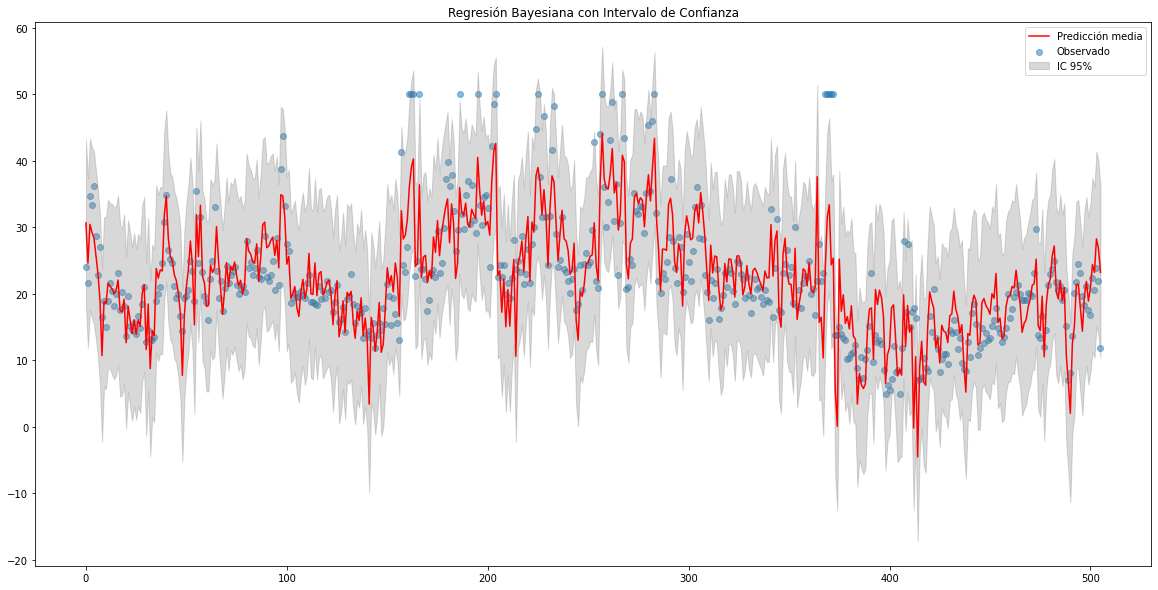

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.scatter(range(len(y)), y, alpha=0.5, label="Observado")
plt.plot(y_pred, color="red", label="Predicción media")
plt.fill_between(
    range(len(y)),
    lower_bound,
    upper_bound,
    alpha=0.3,
    color="gray",
    label="IC 95%"
)
plt.legend()
plt.title("Regresión Bayesiana con Intervalo de Confianza")
plt.show()


In [105]:

coef_mean = bayreg.coef_
coef_index = np.arange(len(coef_mean))
coef_names = X.columns
dict_idx_to_names = {i: name for i, name in zip(coef_index, coef_names)}
dict_names_to_idx = {name: i for i, name in zip(coef_index, coef_names)}
coef_var = np.diag(bayreg.sigma_)
coef_std = np.sqrt(coef_var)


lower = coef_mean - z * coef_std
upper = coef_mean + z * coef_std


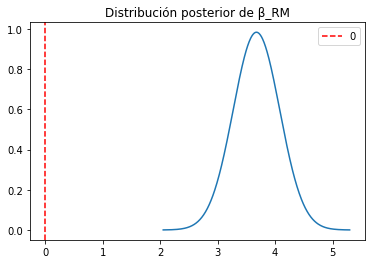

In [107]:

from scipy.stats import norm

var_name='RM'
#j=0
#var_name=dict_idx_to_names[j]
j = dict_names_to_idx[var_name]  # índice del coeficiente

x = np.linspace(
    coef_mean[j] - 4 * coef_std[j],
    coef_mean[j] + 4 * coef_std[j],
    500
)

plt.plot(x, norm.pdf(x, coef_mean[j], coef_std[j]))
plt.axvline(0, color="red", linestyle="--", label="0")
plt.title(f"Distribución posterior de β_{var_name}")
plt.legend()
plt.show()

In [109]:

df_params = pd.DataFrame({
    "feature": X.columns,
    "coef_mean": coef_mean,
    "coef_std": coef_std,
    "lower_95": lower,
    "upper_95": upper
})

df_params["signal_to_noise"] = abs(df_params["coef_mean"]) / df_params["coef_std"]
df_params.sort_values("signal_to_noise", ascending=False)

,feature,coef_mean,coef_std,lower_95,upper_95,signal_to_noise
12,LSTAT,-0.56188,0.05074,-0.66133,-0.46243,11.07421
5,RM,3.67401,0.40547,2.87928,4.46873,9.06105
7,DIS,-1.24523,0.19344,-1.62436,-0.86609,6.43739
10,PTRATIO,-0.79726,0.12554,-1.04333,-0.55119,6.35044
8,RAD,0.28022,0.06653,0.14982,0.41061,4.21202
9,TAX,-0.01406,0.00380,-0.02151,-0.00662,3.70223
11,B,0.01004,0.00272,0.00471,0.01537,3.69090
1,ZN,0.04974,0.01389,0.02251,0.07697,3.58059
0,CRIM,-0.10144,0.03330,-0.16670,-0.03617,3.04608
3,CHAS,1.89485,0.74720,0.43033,3.35937,2.53592


In [110]:
dc_scores.update({str(bayreg).split("(")[0]: np.mean(ls_res)})

In [111]:
dc_scores

{'LinearRegression': 0.11405301290101522,
 'Lars': 0.11388643958845451,
 'Ridge': 0.2873317855328939,
 'Lasso': 0.3060600729140215,
 'ElasticNet': 0.346716648734065,
 'BayesianRidge': 0.213492055305246}

### Summary

In [152]:
resul = pd.DataFrame(columns=[])
alfas = pd.DataFrame(columns=[])
for model in [linreg, larsreg, ridgereg, lassreg, elasnet, bayreg]:
    resul[str(model).split("(")[0]] = model.coef_
    alfas[str(model).split("(")[0]] = [model.intercept_]

In [153]:
alfas

,LinearRegression,Lars,Ridge,Lasso,ElasticNet,BayesianRidge
0,36.45949,36.95133,39.52662,32.52086,41.42140,27.55185


In [154]:
#resul.index = ['intercepto'] + X.columns.to_list()
resul

,LinearRegression,Lars,Ridge,Lasso,ElasticNet,BayesianRidge
0,-0.10801,-0.10992,-0.10131,-0.08329,-0.09995,-0.10144
1,0.04642,0.04775,0.05540,0.04954,0.05563,0.04974
2,0.02056,0.03427,-0.05245,-0.00525,-0.05039,-0.04384
3,2.68673,2.67396,0.42892,0.00000,0.31288,1.89485
4,-17.76661,-18.25012,-0.15001,-0.00000,-0.09624,-2.14193
5,3.80987,3.80245,1.82569,2.49821,1.46092,3.67401
6,0.00069,0.00098,0.00720,0.00360,0.01231,-0.01062
7,-1.47557,-1.48629,-1.08464,-0.93660,-1.00841,-1.24523
8,0.30605,0.32042,0.32549,0.27745,0.33046,0.28022
9,-0.01233,-0.01313,-0.01632,-0.01544,-0.01659,-0.01406


In [155]:
resul["features"] = ls_pred
resul = resul.set_index("features")
alfas["features"] = ["intercepto"]
alfas = alfas.set_index("features")

In [156]:
resul = pd.concat([alfas, resul])

#### Interpretación

In [157]:
resul.sort_values(by="Lasso")

,LinearRegression,Lars,Ridge,Lasso,ElasticNet,BayesianRidge
features,,,,,,
DIS,-1.47557,-1.48629,-1.08464,-0.93660,-1.00841,-1.24523
PTRATIO,-0.95275,-0.96037,-0.83129,-0.75875,-0.82171,-0.79726
LSTAT,-0.52476,-0.52602,-0.69605,-0.65629,-0.72068,-0.56188
CRIM,-0.10801,-0.10992,-0.10131,-0.08329,-0.09995,-0.10144
TAX,-0.01233,-0.01313,-0.01632,-0.01544,-0.01659,-0.01406
INDUS,0.02056,0.03427,-0.05245,-0.00525,-0.05039,-0.04384
CHAS,2.68673,2.67396,0.42892,0.00000,0.31288,1.89485
NOX,-17.76661,-18.25012,-0.15001,-0.00000,-0.09624,-2.14193
AGE,0.00069,0.00098,0.00720,0.00360,0.01231,-0.01062


* CRIM: per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per \$10,000
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    % lower status of the population
* MEDV     Median value of owner-occupied homes in $1000's

In [158]:
df["NOX"].describe()

count   506.00000
mean      0.55470
std       0.11588
min       0.38500
25%       0.44900
50%       0.53800
75%       0.62400
max       0.87100
Name: NOX, dtype: float64

In [159]:
df["RM"].describe()

count   506.00000
mean      6.28463
std       0.70262
min       3.56100
25%       5.88550
50%       6.20850
75%       6.62350
max       8.78000
Name: RM, dtype: float64

#### Preservación de modelo

In [160]:
pd.to_pickle(ridgereg, "modelo.diplo")

In [162]:
otr_modelo = pd.read_pickle("modelo.diplo")

In [163]:
ridgereg.coef_

array([-0.10130764,  0.05540278, -0.05244785,  0.42892425, -0.15000747,
        1.82569   ,  0.00719893, -1.08464089,  0.32549476, -0.01631518,
       -0.83129317,  0.00905722, -0.69605352])

In [164]:
otr_modelo.coef_

array([-0.10130764,  0.05540278, -0.05244785,  0.42892425, -0.15000747,
        1.82569   ,  0.00719893, -1.08464089,  0.32549476, -0.01631518,
       -0.83129317,  0.00905722, -0.69605352])

In [124]:
import pickle

In [125]:
with open("modelo_pickle.diplo", "wb") as f:
    pickle.dump(ridgereg, f)

In [126]:
with open("modelo_pickle.diplo", "rb") as f:
    otro_modelo = pickle.load(f)

In [165]:
otro_modelo

Ridge(alpha=170)

#### Predicción

In [128]:
df["y_hat"] = otro_modelo.predict(X)

In [129]:
df[["target", "y_hat"]].iplot(kind="hist")